In [21]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import LinearRegression
from pyspark.ml.linalg import DenseVector

# Crear la sesión de Spark
spark = SparkSession.builder.getOrCreate()

# Leer los datos
datos = spark.read.csv("data/iris.csv", inferSchema="true", header="true")

# Seleccionar las columnas relevantes
datos.columns
regression_data = datos.select("sepal_length", "sepal_width")

# Combinar características en una columna de vectores
assembler = VectorAssembler(inputCols=["sepal_length"], outputCol="features")
regression_data = assembler.transform(regression_data)

# Mostrar los primeros registros
regression_data.show()

+------------+-----------+--------+
|sepal_length|sepal_width|features|
+------------+-----------+--------+
|         5.1|        3.5|   [5.1]|
|         4.9|        3.0|   [4.9]|
|         4.7|        3.2|   [4.7]|
|         4.6|        3.1|   [4.6]|
|         5.0|        3.6|   [5.0]|
|         5.4|        3.9|   [5.4]|
|         4.6|        3.4|   [4.6]|
|         5.0|        3.4|   [5.0]|
|         4.4|        2.9|   [4.4]|
|         4.9|        3.1|   [4.9]|
|         5.4|        3.7|   [5.4]|
|         4.8|        3.4|   [4.8]|
|         4.8|        3.0|   [4.8]|
|         4.3|        3.0|   [4.3]|
|         5.8|        4.0|   [5.8]|
|         5.7|        4.4|   [5.7]|
|         5.4|        3.9|   [5.4]|
|         5.1|        3.5|   [5.1]|
|         5.7|        3.8|   [5.7]|
|         5.1|        3.8|   [5.1]|
+------------+-----------+--------+
only showing top 20 rows



In [2]:
# Inicializar y ajustar el modelo de regresión lineal
lr = LinearRegression(featuresCol="features", labelCol="sepal_width")
lr_model = lr.fit(regression_data)

# Realizar predicciones
predictions = lr_model.transform(regression_data)

# Mostrar las predicciones
predictions.select("sepal_length", "sepal_width", "prediction").show()

+------------+-----------+------------------+
|sepal_length|sepal_width|        prediction|
+------------+-----------+------------------+
|         5.1|        3.5|3.1033343664866946|
|         4.9|        3.0| 3.115711326079527|
|         4.7|        3.2| 3.128088285672359|
|         4.6|        3.1|3.1342767654687753|
|         5.0|        3.6| 3.109522846283111|
|         5.4|        3.9| 3.084768927097446|
|         4.6|        3.4|3.1342767654687753|
|         5.0|        3.4| 3.109522846283111|
|         4.4|        2.9| 3.146653725061608|
|         4.9|        3.1| 3.115711326079527|
|         5.4|        3.7| 3.084768927097446|
|         4.8|        3.4| 3.121899805875943|
|         4.8|        3.0| 3.121899805875943|
|         4.3|        3.0|3.1528422048580236|
|         5.8|        4.0|3.0600150079117814|
|         5.7|        4.4|3.0662034877081976|
|         5.4|        3.9| 3.084768927097446|
|         5.1|        3.5|3.1033343664866946|
|         5.7|        3.8|3.066203

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


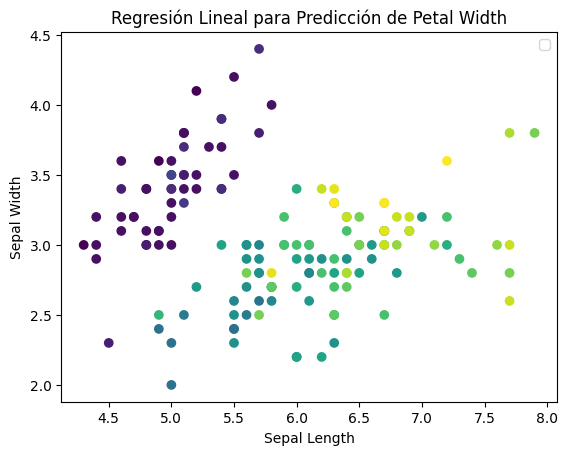

In [6]:
import matplotlib.pyplot as plt
import pandas as pd
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import LinearRegression

# Crear una sesión de Spark
spark = SparkSession.builder.getOrCreate()

# Crear el DataFrame desde el archivo CSV
datos = spark.read.csv("data/iris.csv", inferSchema="true", header="true")

# Seleccionar las columnas relevantes
input_cols = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
assembler = VectorAssembler(inputCols=input_cols, outputCol="features")
final_data = assembler.transform(datos)

# Realizar regresión lineal para predecir "petal_width"
lr = LinearRegression(featuresCol="features", labelCol="petal_width")
lr_model = lr.fit(final_data)
regression_predictions = lr_model.transform(final_data)

# Visualización de la regresión lineal
predictions_pd = regression_predictions.select("sepal_length", "sepal_width", "petal_length", "petal_width", "prediction").toPandas()

fig, ax = plt.subplots()
ax.scatter(predictions_pd["sepal_length"], predictions_pd["sepal_width"], c=predictions_pd["petal_width"], cmap="viridis")
ax.set_xlabel('Sepal Length')
ax.set_ylabel('Sepal Width')
ax.set_title('Regresión Lineal para Predicción de Petal Width')
ax.legend()
plt.show()


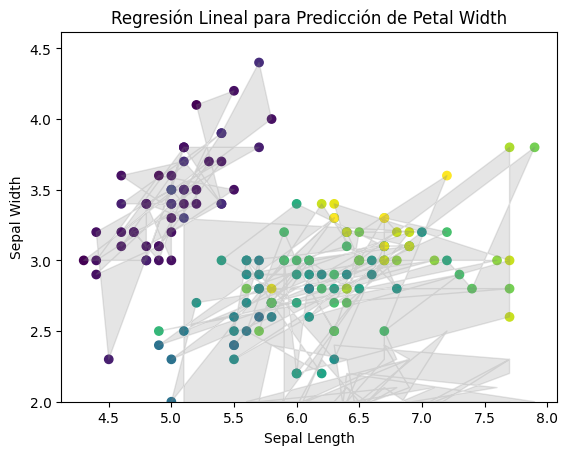

In [12]:
import matplotlib.pyplot as plt
import pandas as pd
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import LinearRegression

# Crear una sesión de Spark
spark = SparkSession.builder.getOrCreate()

# Crear el DataFrame desde el archivo CSV
datos = spark.read.csv("data/iris.csv", inferSchema="true", header="true")

# Seleccionar las columnas relevantes
input_cols = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
assembler = VectorAssembler(inputCols=input_cols, outputCol="features")
final_data = assembler.transform(datos)

# Realizar regresión lineal para predecir "petal_width"
lr = LinearRegression(featuresCol="features", labelCol="petal_width")
lr_model = lr.fit(final_data)
regression_predictions = lr_model.transform(final_data)

# Visualización de la regresión lineal
predictions_pd = regression_predictions.select("sepal_length", "sepal_width", "petal_length", "petal_width", "prediction").toPandas()

fig, ax = plt.subplots()
scatter = ax.scatter(predictions_pd["sepal_length"], predictions_pd["sepal_width"], c=predictions_pd["petal_width"], cmap="viridis", label='Datos reales')
ax.set_xlabel('Sepal Length')
ax.set_ylabel('Sepal Width')
ax.set_title('Regresión Lineal para Predicción de Petal Width')

# Añadir la leyenda manualmente

# Rellenar entre la línea de regresión y los datos reales
ax.fill_between(predictions_pd["sepal_length"], predictions_pd["sepal_width"], predictions_pd["prediction"], color='gray', alpha=0.2, label='Predicción')

# Establecer el límite inferior del eje y (Sepal Width) a 2.0
ax.set_ylim(bottom=2.0)

# Quitar la leyenda "Petal Width"
plt.show()



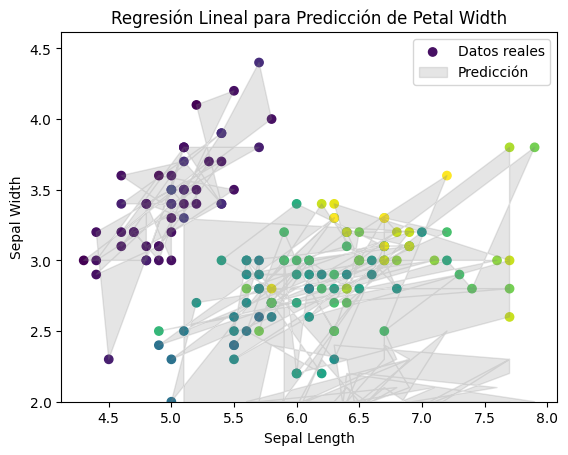

In [13]:
import matplotlib.pyplot as plt
import pandas as pd
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import LinearRegression

# Crear una sesión de Spark
spark = SparkSession.builder.getOrCreate()

# Crear el DataFrame desde el archivo CSV
datos = spark.read.csv("data/iris.csv", inferSchema="true", header="true")

# Seleccionar las columnas relevantes
input_cols = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
assembler = VectorAssembler(inputCols=input_cols, outputCol="features")
final_data = assembler.transform(datos)

# Realizar regresión lineal para predecir "petal_width"
lr = LinearRegression(featuresCol="features", labelCol="petal_width")
lr_model = lr.fit(final_data)
regression_predictions = lr_model.transform(final_data)

# Visualización de la regresión lineal
predictions_pd = regression_predictions.select("sepal_length", "sepal_width", "petal_length", "petal_width", "prediction").toPandas()

fig, ax = plt.subplots()
scatter = ax.scatter(predictions_pd["sepal_length"], predictions_pd["sepal_width"], c=predictions_pd["petal_width"], cmap="viridis", label='Datos reales')
ax.set_xlabel('Sepal Length')
ax.set_ylabel('Sepal Width')
ax.set_title('Regresión Lineal para Predicción de Petal Width')

# Añadir la leyenda manualmente


# Rellenar entre la línea de regresión y los datos reales
ax.fill_between(predictions_pd["sepal_length"], predictions_pd["sepal_width"], predictions_pd["prediction"], color='gray', alpha=0.2, label='Predicción')

# Establecer el límite inferior del eje y (Sepal Width) a 2.0
ax.set_ylim(bottom=2.0)

# Añadir la leyenda manualmente
legend = ax.legend(loc='upper right')
plt.show()


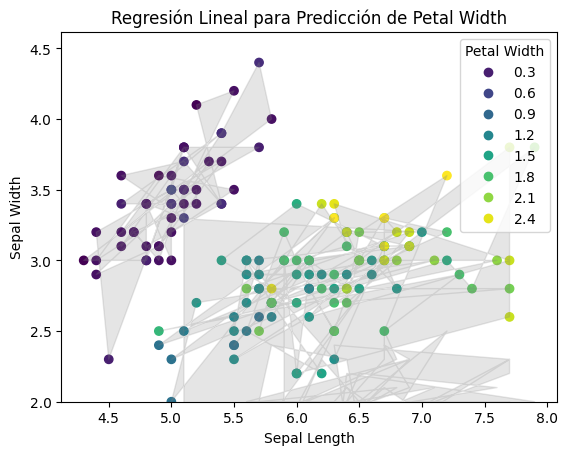

In [14]:
import matplotlib.pyplot as plt
import pandas as pd
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import LinearRegression

# Crear una sesión de Spark
spark = SparkSession.builder.getOrCreate()

# Crear el DataFrame desde el archivo CSV
datos = spark.read.csv("data/iris.csv", inferSchema="true", header="true")

# Seleccionar las columnas relevantes
input_cols = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
assembler = VectorAssembler(inputCols=input_cols, outputCol="features")
final_data = assembler.transform(datos)

# Realizar regresión lineal para predecir "petal_width"
lr = LinearRegression(featuresCol="features", labelCol="petal_width")
lr_model = lr.fit(final_data)
regression_predictions = lr_model.transform(final_data)

# Visualización de la regresión lineal
predictions_pd = regression_predictions.select("sepal_length", "sepal_width", "petal_length", "petal_width", "prediction").toPandas()

fig, ax = plt.subplots()
scatter = ax.scatter(predictions_pd["sepal_length"], predictions_pd["sepal_width"], c=predictions_pd["petal_width"], cmap="viridis", label='Datos reales')
ax.set_xlabel('Sepal Length')
ax.set_ylabel('Sepal Width')
ax.set_title('Regresión Lineal para Predicción de Petal Width')

# Añadir la leyenda manualmente
legend = ax.legend(*scatter.legend_elements(), title="Petal Width")

# Rellenar entre la línea de regresión y los datos reales
ax.fill_between(predictions_pd["sepal_length"], predictions_pd["sepal_width"], predictions_pd["prediction"], color='gray', alpha=0.2, label='Predicción')

# Establecer el límite inferior del eje y (Sepal Width) a 2.0
ax.set_ylim(bottom=2.0)

plt.show()


TypeError: _AxesBase.set_ylim() got an unexpected keyword argument 'botto'

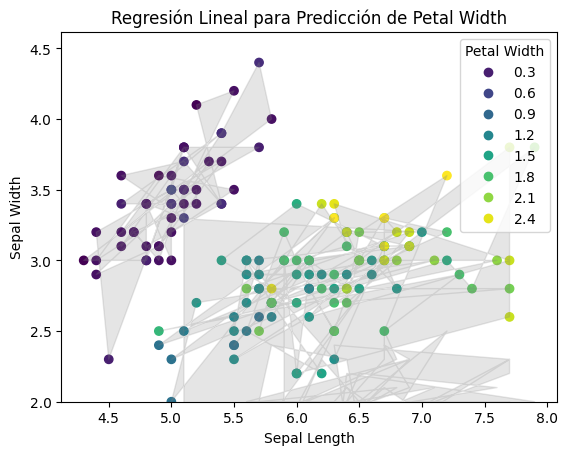

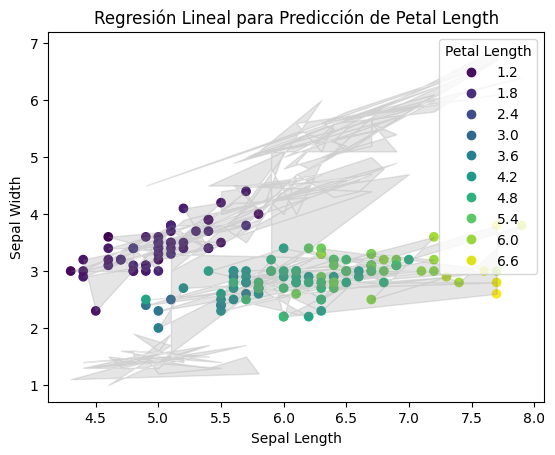

In [20]:
import matplotlib.pyplot as plt
import pandas as pd
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import LinearRegression

# Crear una sesión de Spark
spark = SparkSession.builder.getOrCreate()

# Crear el DataFrame desde el archivo CSV
datos = spark.read.csv("data/iris.csv", inferSchema="true", header="true")

# Seleccionar las columnas relevantes
input_cols = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
assembler = VectorAssembler(inputCols=input_cols, outputCol="features")
final_data = assembler.transform(datos)

# Realizar regresión lineal para predecir "petal_width"
lr_width = LinearRegression(featuresCol="features", labelCol="petal_width")
lr_model_width = lr_width.fit(final_data)
regression_predictions_width = lr_model_width.transform(final_data)

# Realizar regresión lineal para predecir "petal_length"
lr_length = LinearRegression(featuresCol="features", labelCol="petal_length")
lr_model_length = lr_length.fit(final_data)
regression_predictions_length = lr_model_length.transform(final_data)

# Visualización de la regresión lineal para "petal_width"
predictions_pd_width = regression_predictions_width.select("sepal_length", "sepal_width", "petal_length", "petal_width", "prediction").toPandas()

fig, ax = plt.subplots()
scatter_width = ax.scatter(predictions_pd_width["sepal_length"], predictions_pd_width["sepal_width"], c=predictions_pd_width["petal_width"], cmap="viridis", label='Datos reales (Petal Width)')
ax.set_xlabel('Sepal Length')
ax.set_ylabel('Sepal Width')
ax.set_title('Regresión Lineal para Predicción de Petal Width')

# Añadir la leyenda manualmente
legend_width = ax.legend(*scatter_width.legend_elements(), title="Petal Width")

# Rellenar entre la línea de regresión y los datos reales (Petal Width)
ax.fill_between(predictions_pd_width["sepal_length"], predictions_pd_width["sepal_width"], predictions_pd_width["prediction"], color='gray', alpha=0.2, label='Predicción (Petal Width)')

# Establecer el límite inferior del eje y (Sepal Width) a 2.0
ax.set_ylim(bottom=2.0)

# Visualización de la regresión lineal para "petal_length"
predictions_pd_length = regression_predictions_length.select("sepal_length", "sepal_width", "petal_length", "petal_width", "prediction").toPandas()

fig, ax = plt.subplots()
scatter_length = ax.scatter(predictions_pd_length["sepal_length"], predictions_pd_length["sepal_width"], c=predictions_pd_length["petal_length"], cmap="viridis", label='Datos reales (Petal Length)')
ax.set_xlabel('Sepal Length')
ax.set_ylabel('Sepal Width')
ax.set_title('Regresión Lineal para Predicción de Petal Length')

# Añadir la leyenda manualmente
legend_length = ax.legend(*scatter_length.legend_elements(), title="Petal Length")

# Rellenar entre la línea de regresión y los datos reales (Petal Length)
ax.fill_between(predictions_pd_length["sepal_length"], predictions_pd_length["sepal_width"], predictions_pd_length["prediction"], color='gray', alpha=0.2, label='Predicción (Petal Length)')

# Establecer el límite inferior del eje y (Sepal Width) a 2.0
ax.set_ylim(botto=3.0)

plt.show()
